In [43]:
from scipy.stats import wasserstein_distance
import matplotlib.pyplot as plt
import pandas as pd
import numpy  as np
import ast

In [44]:
df  = pd.read_csv('DataBase.csv')
df.head()

,device,kernel
0,"{'time': 416.47, 's2': {'ax': -0.06943185, 'ay...","{'pitch': 0.0, 'roll': 0.0, 'yaw': 0.0, 'wx': ..."
1,"{'time': 416.47, 's2': {'ax': -0.06943185, 'ay...","{'pitch': 0.0, 'roll': 0.0, 'yaw': 0.0, 'wx': ..."
2,"{'time': 416.49, 's2': {'ax': -0.05985504, 'ay...","{'pitch': 0.0, 'roll': 0.0, 'yaw': 0.0, 'wx': ..."
3,"{'time': 416.51, 's2': {'ax': -0.1077391, 'ay'...","{'pitch': 0.0, 'roll': 0.0, 'yaw': 0.0, 'wx': ..."
4,"{'time': 416.51, 's2': {'ax': -0.1077391, 'ay'...","{'pitch': 0.0, 'roll': 0.0, 'yaw': 0.0, 'wx': ..."


# TRATAMENTO DE DADOS

In [45]:
df = df.head(20000).copy()

In [46]:
device = df.device.apply(ast.literal_eval).apply(pd.Series)
device

,time,s2,s1
0,416.470,"{'ax': -0.06943185, 'ay': -2.954445, 'wz': -0....","{'ax': -0.01197101, 'ay': -2.920926, 'wz': -0...."
1,416.470,"{'ax': -0.06943185, 'ay': -2.954445, 'wz': -0....","{'ax': -0.01197101, 'ay': -2.920926, 'wz': -0...."
2,416.490,"{'ax': -0.05985504, 'ay': -2.762909, 'wz': -0....","{'ax': -0.03591302, 'ay': -2.913743, 'wz': -0...."
3,416.510,"{'ax': -0.1077391, 'ay': -2.961627, 'wz': -0.0...","{'ax': -0.02154782, 'ay': -2.942474, 'wz': -0...."
4,416.510,"{'ax': -0.1077391, 'ay': -2.961627, 'wz': -0.0...","{'ax': -0.02154782, 'ay': -2.942474, 'wz': -0...."
...,...,...,...
19995,666.037,"{'ax': 11.86806, 'ay': -1.692701, 'wz': 0.2458...","{'ax': 11.94946, 'ay': -1.78368, 'wz': 0.27272..."
19996,666.057,"{'ax': 9.337387, 'ay': -1.142034, 'wz': 0.1869...","{'ax': 9.797073, 'ay': -0.01675941, 'wz': 0.27..."
19997,666.077,"{'ax': 11.79384, 'ay': -1.247379, 'wz': -0.005...","{'ax': 11.79384, 'ay': -1.247379, 'wz': -0.003..."
19998,666.077,"{'ax': 11.79384, 'ay': -1.247379, 'wz': -0.005...","{'ax': 11.79384, 'ay': -1.247379, 'wz': -0.003..."


In [47]:
kernel = df.kernel.apply(ast.literal_eval).apply(pd.Series)
kernel

,pitch,roll,yaw,wx,wy,wz,ax,ay,az
0,0.00,0.00,0.00,5.0,2.0,-1.0,-91.0,123.0,474.0
1,0.00,0.00,0.00,5.0,2.0,-1.0,-91.0,123.0,474.0
2,0.00,0.00,0.00,5.0,2.0,-1.0,-91.0,123.0,474.0
3,0.00,0.00,0.00,5.0,2.0,-1.0,-91.0,123.0,474.0
4,0.00,0.00,0.00,5.0,2.0,-1.0,-91.0,123.0,474.0
...,...,...,...,...,...,...,...,...,...
19995,10.61,-81.78,352.68,43.0,326.0,-55.0,491.0,91.0,36.0
19996,10.81,-80.60,352.75,-151.0,1356.0,-223.0,473.0,97.0,139.0
19997,10.81,-80.60,352.75,-151.0,1356.0,-223.0,473.0,97.0,139.0
19998,10.81,-80.60,352.75,-151.0,1356.0,-223.0,473.0,97.0,139.0


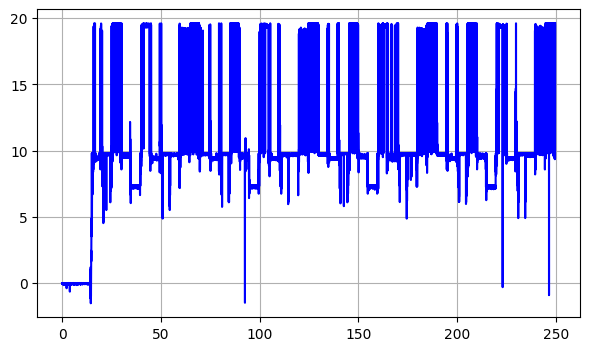

In [48]:
device['time'] = device.time - device.time.values[0]

plt.figure(figsize=(7, 4))
plt.plot(device.time, [s['ax'] for s in device['s1']], color='blue')
plt.grid()

# LIMITES

In [49]:
key    = 'wx'
sensor = 's1'

In [50]:
SAMPLE_RANGE = (0, 120)
kernel['time'] = device.time

device = device.copy().loc[(device.time > SAMPLE_RANGE[0]) & (device.time < SAMPLE_RANGE[1])]
kernel = kernel.copy().loc[(kernel.time > SAMPLE_RANGE[0]) & (kernel.time < SAMPLE_RANGE[1])]

device['time'] = device.time - device.time.values[0]
kernel['time'] = kernel.time - kernel.time.values[0]

In [51]:
device.head()

,time,s2,s1
2,0.00,"{'ax': -0.05985504, 'ay': -2.762909, 'wz': -0....","{'ax': -0.03591302, 'ay': -2.913743, 'wz': -0...."
3,0.02,"{'ax': -0.1077391, 'ay': -2.961627, 'wz': -0.0...","{'ax': -0.02154782, 'ay': -2.942474, 'wz': -0...."
4,0.02,"{'ax': -0.1077391, 'ay': -2.961627, 'wz': -0.0...","{'ax': -0.02154782, 'ay': -2.942474, 'wz': -0...."
5,0.04,"{'ax': -0.007182605, 'ay': -3.0143, 'wz': -0.0...","{'ax': -0.002394202, 'ay': -2.999935, 'wz': -0..."
6,0.04,"{'ax': -0.007182605, 'ay': -3.0143, 'wz': -0.0...","{'ax': -0.002394202, 'ay': -2.999935, 'wz': -0..."


In [52]:
kernel.head()

,pitch,roll,yaw,wx,wy,wz,ax,ay,az,time
2,0.0,0.0,0.0,5.0,2.0,-1.0,-91.0,123.0,474.0,0.00
3,0.0,0.0,0.0,5.0,2.0,-1.0,-91.0,123.0,474.0,0.02
4,0.0,0.0,0.0,5.0,2.0,-1.0,-91.0,123.0,474.0,0.02
5,0.0,0.0,0.0,5.0,2.0,-1.0,-91.0,123.0,474.0,0.04
6,0.0,0.0,0.0,5.0,2.0,-1.0,-91.0,123.0,474.0,0.04


# ANÁLISE

In [53]:
kernelData = np.array(kernel[key])
sensorData = np.array([s[key] for s in device[sensor]])

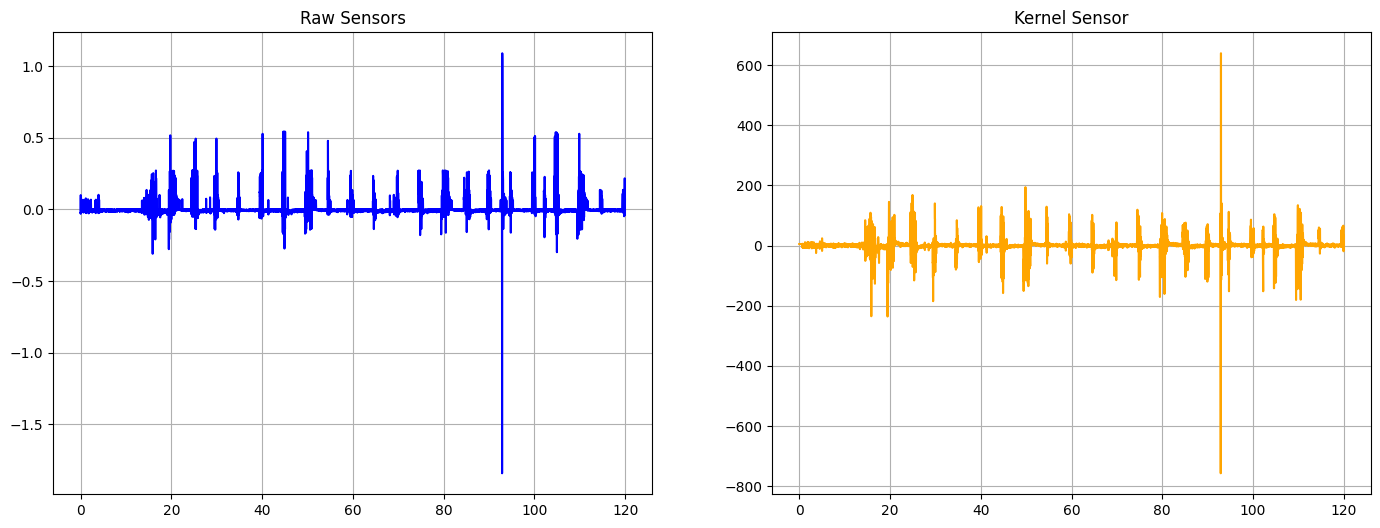

In [54]:
plt.figure(figsize=(17, 6))
plt.subplot(1, 2, 1)
plt.plot(device.time, sensorData, color='blue')
plt.title('Raw Sensors')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(kernel.time, kernelData, color='orange')
plt.title('Kernel Sensor')
plt.grid()

- Comparação normalizada com erro relacionado à distancia entre os pontos

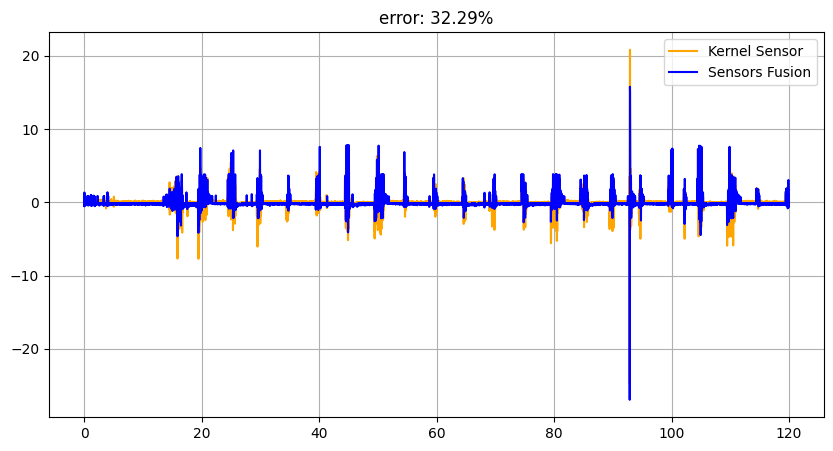

In [55]:
def normalize(data):
    return np.array(data - np.mean(data))/np.std(data)

def compare(data1, data2):
    data1 = normalize(data1)
    data2 = normalize(data2)
    score = wasserstein_distance(data1, data2)
    return data1, data2, score


k, s, score = compare(kernelData, sensorData)
plt.figure(figsize=(10, 5))
plt.plot(kernel.time, k, color='orange', label='Kernel Sensor')
plt.plot(device.time, s, color='blue',  label='Sensors Fusion')
plt.title(f'error: {score*100:.2f}%')
plt.legend(), plt.grid()
plt.show()

# FILTRO

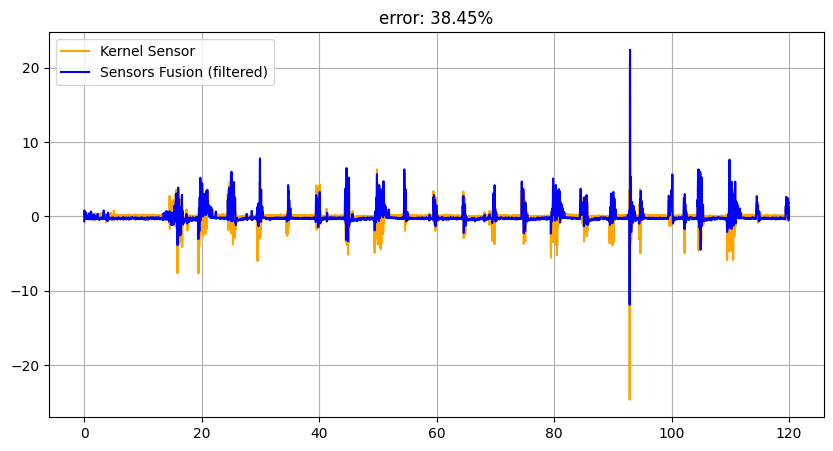

In [56]:
from scipy.signal import butter, filtfilt

order = 2          # Ordem do filtro
cutoff_freq = 0.3  # Frequência de corte (ajuste conforme seu sinal)
b, a   = butter(order, cutoff_freq, btype='low', analog=False)

yModel = filtfilt(b, a, sensorData)
k, s, score = compare(kernelData, yModel)

plt.figure(figsize=(10, 5))
plt.plot(kernel.time, k, color='orange', label='Kernel Sensor')
plt.plot(device.time, s, color='blue',  label='Sensors Fusion (filtered)')
plt.title(f'error: {score*100:.2f}%')
plt.legend(), plt.grid()
plt.show()